In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("file1.csv")

In [3]:
df

,Unnamed: 0,Fruit,Temp,Humidity,CO2,Days,Spoiled
0,107,Banana,18,58,410,5,No
1,1,Banana,22,55,399,6,Yes
2,44,Plum,23,68,399,4,Yes
3,67,Tomato,22,55,419,6,Yes
4,45,Plum,22,53,400,5,Yes
...,...,...,...,...,...,...,...
245,174,Plum,23,68,399,3,No
246,239,Lemon,22,68,402,5,No
247,157,Papaya,19,67,402,5,No
248,136,Mango,25,57,404,7,No


In [4]:
df.drop('Unnamed: 0',axis = 1,inplace = True)
df

,Fruit,Temp,Humidity,CO2,Days,Spoiled
0,Banana,18,58,410,5,No
1,Banana,22,55,399,6,Yes
2,Plum,23,68,399,4,Yes
3,Tomato,22,55,419,6,Yes
4,Plum,22,53,400,5,Yes
...,...,...,...,...,...,...
245,Plum,23,68,399,3,No
246,Lemon,22,68,402,5,No
247,Papaya,19,67,402,5,No
248,Mango,25,57,404,7,No


In [5]:
Spoil = pd.Series(map(lambda x: dict(Yes=1, No=0)[x],
              df.Spoiled.values.tolist()), df.index)
Spoil

0      0
1      1
2      1
3      1
4      1
      ..
245    0
246    0
247    0
248    0
249    0
Length: 250, dtype: int64

In [6]:
df.drop('Spoiled', axis=1, inplace=True)
df = df.assign(Spoiled=Spoil)
df

,Fruit,Temp,Humidity,CO2,Days,Spoiled
0,Banana,18,58,410,5,0
1,Banana,22,55,399,6,1
2,Plum,23,68,399,4,1
3,Tomato,22,55,419,6,1
4,Plum,22,53,400,5,1
...,...,...,...,...,...,...
245,Plum,23,68,399,3,0
246,Lemon,22,68,402,5,0
247,Papaya,19,67,402,5,0
248,Mango,25,57,404,7,0


In [7]:
import category_encoders as ce
encoder = ce.OneHotEncoder(use_cat_names= True)
data = encoder.fit_transform(df)
data

,Fruit_Banana,Fruit_Plum,Fruit_Tomato,Fruit_Jackfruit,Fruit_Grapes,Fruit_Lemon,Fruit_Banana,Fruit_Mango,Fruit_Papaya,Fruit_Litchi,Fruit_Apple,Fruit_Jackfruit,Fruit_Mango,Fruit_Grapes,Temp,Humidity,CO2,Days,Spoiled
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,18,58,410,5,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,22,55,399,6,1
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,23,68,399,4,1
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,22,55,419,6,1
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,22,53,400,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0,1,0,0,0,0,0,0,0,0,0,0,0,0,23,68,399,3,0
246,0,0,0,0,0,1,0,0,0,0,0,0,0,0,22,68,402,5,0
247,0,0,0,0,0,0,0,0,1,0,0,0,0,0,19,67,402,5,0
248,0,0,0,0,0,0,0,1,0,0,0,0,0,0,25,57,404,7,0


In [8]:
X = data.drop('Spoiled',axis = 1).copy()
X

,Fruit_Banana,Fruit_Plum,Fruit_Tomato,Fruit_Jackfruit,Fruit_Grapes,Fruit_Lemon,Fruit_Banana,Fruit_Mango,Fruit_Papaya,Fruit_Litchi,Fruit_Apple,Fruit_Jackfruit,Fruit_Mango,Fruit_Grapes,Temp,Humidity,CO2,Days
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,18,58,410,5
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,22,55,399,6
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,23,68,399,4
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,22,55,419,6
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,22,53,400,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0,1,0,0,0,0,0,0,0,0,0,0,0,0,23,68,399,3
246,0,0,0,0,0,1,0,0,0,0,0,0,0,0,22,68,402,5
247,0,0,0,0,0,0,0,0,1,0,0,0,0,0,19,67,402,5
248,0,0,0,0,0,0,0,1,0,0,0,0,0,0,25,57,404,7


In [9]:
y = Spoil
y

0      0
1      1
2      1
3      1
4      1
      ..
245    0
246    0
247    0
248    0
249    0
Length: 250, dtype: int64

In [75]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [76]:
X_train = scale(X_train)
X_test = scale(X_test)

In [77]:
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn import metrics

In [92]:
svc = SVC(kernel='linear',C = 100)
svc.fit(X_train, y_train)

SVC(C=100)

In [93]:
y_pred = svc.predict(X_test)

In [94]:
y_pred1 = svc.predict(X_train)

In [95]:
print('Accuracy:'+ str(svc.score(X_test,y_test) * 100) + '%')

Accuracy:68.0%


In [91]:
svc.score(X_train,y_train)

0.93

AxesSubplot(0.125,0.125;0.62x0.755)


Text(33.0, 0.5, 'Truth')

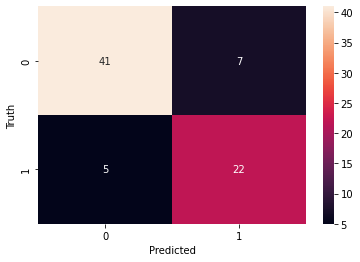

In [17]:
from sklearn.metrics import classification_report, confusion_matrix 
import matplotlib.pyplot as plt
import seaborn as sns
print(sns.heatmap(confusion_matrix(y_test,y_pred),annot=True))
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87        48
           1       0.76      0.81      0.79        27

    accuracy                           0.84        75
   macro avg       0.82      0.83      0.83        75
weighted avg       0.84      0.84      0.84        75



In [19]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [20]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [54]:
train_sizes, train_scores, valid_scores = learning_curve(
...     SVC(kernel='linear',C = 50), X, y, train_sizes=[50, 100,200], cv=10)

In [55]:
np.mean(train_scores)

0.9175000000000002

In [56]:
np.mean(valid_scores)

0.8280000000000002

NameError: name 'plot_learning_curve' is not defined

In [ ]:
from sklearn.model_selection import validation_curve

In [ ]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)


In [ ]:
param_range = np.logspace(-6, -1, 5)
train_scores, test_scores = validation_curve(
    SVC(), X, y, param_name="C", param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel("$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

<AxesSubplot:>

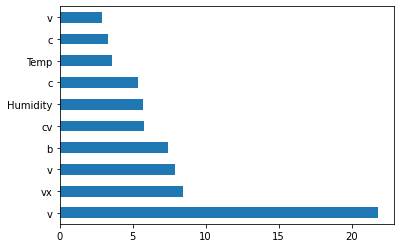